In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Fraud.csv')

In [3]:
df.shape

(6362620, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
legit=df[df.isFraud==0]
fraud=df[df.isFraud==1]

In [9]:
print(legit)

         step      type     amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT    9839.64  C1231006815       170136.0   
1           1   PAYMENT    1864.28  C1666544295        21249.0   
4           1   PAYMENT   11668.14  C2048537720        41554.0   
5           1   PAYMENT    7817.71    C90045638        53860.0   
6           1   PAYMENT    7107.77   C154988899       183195.0   
...       ...       ...        ...          ...            ...   
6362319   718   PAYMENT    8634.29   C642813806       518802.0   
6362320   718  CASH_OUT  159188.22   C691808084         3859.0   
6362321   718  CASH_OUT  186273.84   C102120699       168046.0   
6362322   718  TRANSFER   82096.45   C614459560        13492.0   
6362323   718     DEBIT    1864.24    C49652609        20426.0   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225         

In [10]:
print(legit.shape)
print(fraud.shape)


(6354407, 11)
(8213, 11)


In [11]:
#Statistical Measure of data
legit.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

In [12]:
legit_sample = legit.sample(n=8213) 

In [13]:
nd=pd.concat([legit_sample,fraud],axis=0)


In [14]:
nd.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1521460,153,PAYMENT,9947.74,C408186755,6485.00,0.00,M929703083,0.00,0.00,0,0
306886,16,CASH_IN,2025.87,C1473100099,19597.00,21622.87,C1803461635,731.00,0.00,0,0
3762455,279,TRANSFER,1196366.45,C1323635214,0.00,0.00,C1639126536,2692468.47,3888834.92,0,0
6204173,585,CASH_IN,493888.18,C793826902,561008.68,1054896.86,C23454652,3096986.64,2603098.46,0,0
3085177,235,CASH_OUT,168820.51,C1698656617,49901.91,0.00,C17283159,170630.73,339451.24,0,0


In [15]:
nd.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [16]:
nd['isFraud'].value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: int64

In [17]:
#dplitting the dta into features and targets
#list_drop = [','nameOrig']

#x=nd.drop(columns='type',axis=1)
#y=nd['type']"
x=nd.drop(['nameOrig','type','nameDest'],axis=1)
y=nd['type']

In [18]:
x.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1521460,153,9947.74,6485.00,0.00,0.00,0.00,0,0
306886,16,2025.87,19597.00,21622.87,731.00,0.00,0,0
3762455,279,1196366.45,0.00,0.00,2692468.47,3888834.92,0,0
6204173,585,493888.18,561008.68,1054896.86,3096986.64,2603098.46,0,0
3085177,235,168820.51,49901.91,0.00,170630.73,339451.24,0,0


In [19]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)


In [20]:
print(x.shape,x_train.shape,x_test.shape)

(16426, 8) (13140, 8) (3286, 8)


In [21]:
#logistic regression

model=LogisticRegression()

In [22]:
#training logistic regression model with training data
model.fit(x_train,y_train)

LogisticRegression()

In [23]:
#accuracy on training data
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [24]:
print("accuracy score on training data:")
print( training_data_accuracy)

accuracy score on training data:
0.760882800608828


In [25]:

#accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [26]:
print("accuracy on test data:")
print(test_data_accuracy)

accuracy on test data:
0.7681071211199026


In [27]:
# LOgistic Regression model accuracy ~0.8

In [28]:

####Second Method for Prediction

In [29]:
df1 = df.rename(columns={'nameOrig':'nameorig','oldbalanceOrg':'oldbalanceorig','newbalanceOrig':'newbalanceorig','nameDest':'namedest'
    ,'oldbalanceDest':'oldbalancedest','newbalanceDest':'newbalancedest'})
df1.columns

Index(['step', 'type', 'amount', 'nameorig', 'oldbalanceorig',
       'newbalanceorig', 'namedest', 'oldbalancedest', 'newbalancedest',
       'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [30]:
df2 = df1.copy(deep = 'true')
df2['type']=df2['type'].map({'PAYMENT':1 ,'TRANSFER':2, 'CASH_OUT':3, 'DEBIT':4, 'CASH_IN':5})
df2 = df2.drop(columns = ['nameorig','namedest','isFraud','isFlaggedFraud'])
df2.head()

,step,type,amount,oldbalanceorig,newbalanceorig,oldbalancedest,newbalancedest
0,1,1,9839.64,170136.0,160296.36,0.0,0.0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0
2,1,2,181.00,181.0,0.00,0.0,0.0
3,1,3,181.00,181.0,0.00,21182.0,0.0
4,1,1,11668.14,41554.0,29885.86,0.0,0.0


In [31]:
#calculating VIf to check the MUlti-collinearity between variables -

vif_data = pd.DataFrame()                         
vif_data["feature"] = df2.columns
vif_data["VIF"] = [variance_inflation_factor(df2.values, i)
                          for i in range(len(df2.columns))]
print(vif_data)

          feature         VIF
0            step    2.466060
1            type    3.251976
2          amount    4.129854
3  oldbalanceorig  501.282300
4  newbalanceorig  508.906801
5  oldbalancedest   73.377939
6  newbalancedest   84.656570


As we can see, oldbalance and newbalance have very high values of VIF, indicating that these two variables are highly correlated. This is expected as the transaction happens does changes their values. Hence, considering these two features together leads to a model with high multicollinearity.


1.) which type of transactions are fraud using isFraud -
There are 2 flags From those,isFraud is the indicator which indicates the actual fraud transactions whereas isFlaggedFraud is what the system prevents the transaction due to some thresholds being triggered.

In [32]:
print('Type of transaction which are fraud:{}'.format(list(df1.loc[df1.isFraud == 1].type.drop_duplicates().values)))

fraud_transfer = df1.loc[(df1.isFraud == 1) & (df1.type == 'TRANSFER')]
fraud_cashout = df1.loc[(df1.isFraud == 1) & (df1.type == 'CASH_OUT')]
 

print('number of transfer are fraud :{}'.format(len(fraud_transfer)))
print('number of cashout are fraud :{}'.format(len(fraud_cashout)))

Type of transaction which are fraud:['TRANSFER', 'CASH_OUT']
number of transfer are fraud :4097
number of cashout are fraud :4116


2. Analysis on isFlaggedFraud variable -
isFlaggedFraud = The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.



In [33]:
amount_flagfraud0 = list(df1.loc[(df1.isFlaggedFraud == 0) ].amount.values)
amount_flagfraud1 = list(df1.loc[(df1.isFlaggedFraud == 1) ].amount.values)



print('minimum amount transfer where isFlaggedFraud is 1 = {}'.format(min(amount_flagfraud1)))
print('maximum amount transfer where isFlaggedFraud is 0 = {}'.format(max(amount_flagfraud0)))
print('Number of isFlaggedFraud == 1 : {}'.format(len(list(df1.loc[df1.isFlaggedFraud ==1 ].isFlaggedFraud.values))))


minimum amount transfer where isFlaggedFraud is 1 = 353874.22
maximum amount transfer where isFlaggedFraud is 0 = 92445516.64
Number of isFlaggedFraud == 1 : 16


isFlaggedFraud variable is set to 1 when transfer is more than 200,000 in single transaction but we can see that from above analysis. This variable is useless because maximum amount transfer in single transcation is 92445516.64 , There are only 16 values where isFlaggedFraud is set so we will drop this feature.

In [34]:
print('number of recipant who have newbalancedest and oldbalancedest is zero :{}'
      .format(len(df1.loc[(df1.newbalancedest == 0) & (df1.oldbalancedest == 0) ].namedest.values)))


number of recipant who have newbalancedest and oldbalancedest is zero :2317282


In [35]:
zero_balance = list(df1.loc[(df1.oldbalanceorig == 0) & (df1.newbalanceorig == 0) & (df1.amount != 0)].type.values)

print('Number of transcation where oldbalanceorig & newbalanceorig is zero but amount of transaction is not zero :{}'.format(len(zero_balance)))


Number of transcation where oldbalanceorig & newbalanceorig is zero but amount of transaction is not zero :2088969


Lets see how many merchants account in originator accounts and does merchants account have fraud transaction ?
oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

In [36]:
print('number of merchants in originator transaction: {}' .format(df1.nameorig.str.contains('M').any()))
print('number of merchant acoount in destination where type is Transfer : {}' .format(df1.loc[df1.type =='TRANSFER'].namedest.str.contains('M').any()))
print('number of merchant acoount in destination where type is cashout : {}' .format(df1.loc[df1.type =='CASH_OUT'].namedest.str.contains('M').any()))


number of merchants in originator transaction: False
number of merchant acoount in destination where type is Transfer : False
number of merchant acoount in destination where type is cashout : False



There are no Merchant account through Fraud transaction is happen so missing information does not affect while building model
Data cleaning -
3. How did you select variables to be included in the model?
From above analysis we know that fraud is only occured in 'TRANSFER' and 'CASH_OUT'. sow we choose only those type of payment and we will remove Variables -[ nameorig , namedest , isFlaggedFraud ]

In [37]:
x = df1.loc[(df1.type == 'TRANSFER') | (df1.type == 'CASH_OUT')]
y = x.isFraud
x = x.drop(['isFraud','isFlaggedFraud','nameorig','namedest'],axis = 1)
x['type']= x['type'].map({'TRANSFER':1,'CASH_OUT':2})

In [38]:

x.loc[(x.oldbalancedest == 0) & (x.newbalancedest == 0) & (x.amount != 0) ,['oldbalancedest','newbalancedest'] ] = -1 
x.loc[(x.oldbalanceorig == 0) & (x.newbalanceorig == 0) & (x.amount != 0) ,['oldbalanceorig','newbalanceorig'] ] = 0 


Feature engineering -
From above analysis we can create two features of error at origin and destination account, where non zero amount is transfer but oldbalance and new balance have zero value

In [39]:
x['errorbalanceorig'] = x.newbalanceorig + x.amount - x.oldbalanceorig   # eg origin- oldbal = 10 ,newbal = 8 ,amount = 2 so, error =  8+2-10 = 0 
x['errorbalancedest'] = x.oldbalancedest + x.amount - x.newbalancedest


Data visualization -
Best way to see that our data can be calssified is to visualize the data .

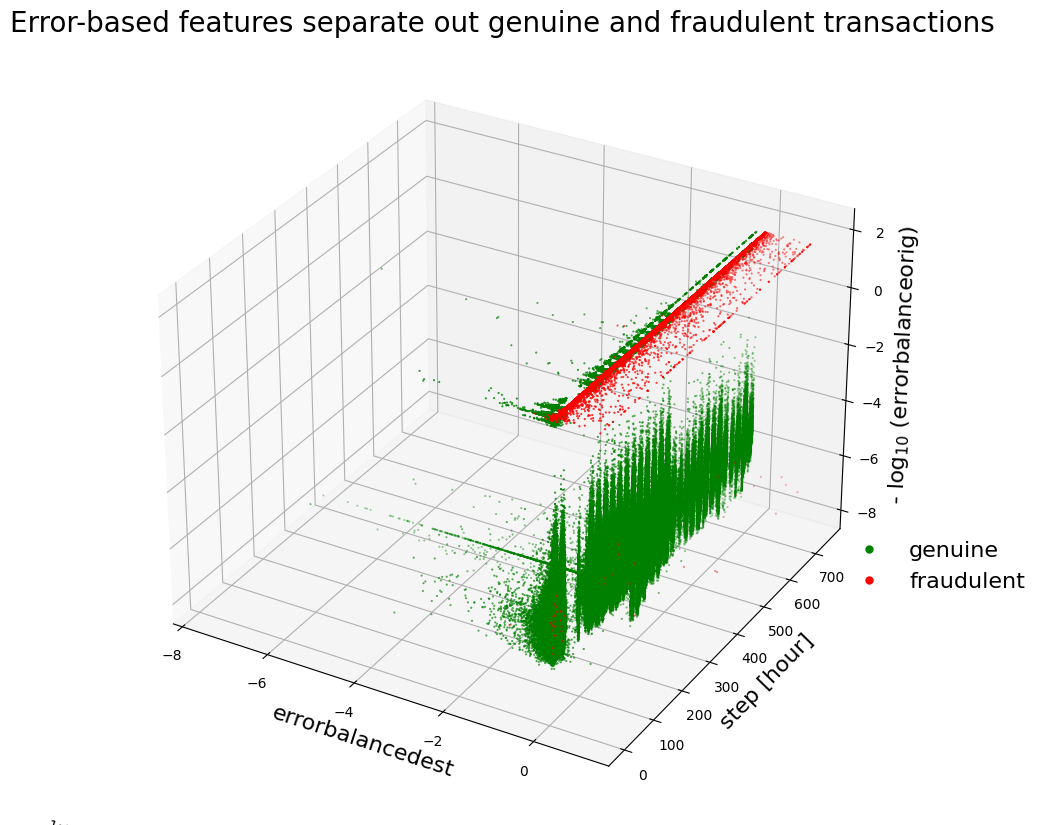

In [40]:
x1 = 'errorbalancedest'                                       
y1 = 'step'
z1= 'errorbalanceorig'
zOffset = 0.02
limit = len(x)

sns.reset_orig() 

fig = plt.figure(figsize = (10, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x.loc[y == 0, x1][:limit], x.loc[y == 0, y1][:limit], \
  -np.log10(x.loc[y == 0, z1][:limit] + zOffset), c = 'g', marker = '.', \
  s = 1, label = 'genuine')
    
ax.scatter(x.loc[y == 1, x1][:limit], x.loc[y == 1, y1][:limit], \
  -np.log10(x.loc[y == 1, z1][:limit] + zOffset), c = 'r', marker = '.', \
  s = 1, label = 'fraudulent')

ax.set_xlabel(x1, size = 16); 
ax.set_ylabel(y1 + ' [hour]', size = 16); 
ax.set_zlabel('- log$_{10}$ (' + z1 + ')', size = 16)
ax.set_title('Error-based features separate out genuine and fraudulent \
transactions', size = 20)

plt.axis('tight')
ax.grid(1)

noFraudMarker = mlines.Line2D([], [], linewidth = 0, color='g', marker='.',
                          markersize = 10, label='genuine')
fraudMarker = mlines.Line2D([], [], linewidth = 0, color='r', marker='.',
                          markersize = 10, label='fraudulent')

plt.legend(handles = [noFraudMarker, fraudMarker], \
           bbox_to_anchor = (1.20, 0.38 ), frameon = False, prop={'size': 16});

We can seprate data using our new features as we can see in our above visualization.
Machine learning for predicting fraudulent transactions -
checking if the data is imbalance or skew -

In [41]:
xfraud = x.loc[y==1]
xnotfraud = x.loc[y == 0]

print(len(xfraud))
print(len(xnotfraud))

8213
2762196


Data split in (80:20) ratio between train and test

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=27)


2) Describe your fraud detection model in elaboration.
Selection of ML algorithm: A first approach to deal with imbalanced data is to balance it by discarding the majority class before applying an ML algorithm. The disadvantage of undersampling is that a model trained in this way will not perform well on real-world skewed test data since almost all the information was discarded. A better approach might be to oversample the minority class, say by the synthetic minority oversampling technique (SMOTE) contained in the 'imblearn' library. Motivated by this, I tried a variety of anomaly-detection and supervised learning approaches. I find, however, that the best result is obtained on the original dataset by using a ML algorithm based on ensembles of decision trees that intrinsically performs well on imbalanced data. Such algorithms not only allow for constructing a model that can cope with the missing values in our data, but they naturally allow for speedup via parallel-processing. Among these algorithms, the extreme gradient-boosted (XGBoost) algorithm used. Finally, XGBoost, like several other ML algorithms, allows for weighting the positive class more compared to the negative class --- a setting that also allows to account for the skew in the data

4) Demonstrate the performance of the model by using best set of tools.
Selection of metric: Since the data is highly skewed, I use the area under the precision-recall curve (AUPRC) rather than the conventional area under the receiver operating characteristic (AUROC).AUPRC on a dataset with 99% negative 1% positive examples, and it will “focus” on how the model handles the 1% positive examples. If the model handles the positive examples well, AUPRC will be high. If the model does poorly on the positive examples, AUPRC will be low.




In [43]:
weights = (y == 0).sum() / (1.0 * (y == 1).sum())                  #xgb uses the scale_pos_weight to account for highly skewed datset
clf = XGBClassifier(max_depth = 3, scale_pos_weight = weights,
                n_jobs = 4)
probabilities = clf.fit(X_train,y_train).predict_proba(X_test)
print('AUPRC = {}'.format(average_precision_score(y_test, probabilities[:, 1])))


AUPRC = 0.3650600457478117



SO AUPRC score is 0.36 means our model performing well on positive (fraudlant transaction) class.

CONCLUSION -

7)What kind of prevention should be adopted while company update its infrastructure?

Company can prevent fraudalnt transaction by focusing more on payment method type - 'Transfer' & 'Cash_out'
Look Out for Patterns in Fraud and Theft 

8)Assuming these actions have been implemented, how would you determine if they work?
we can retrain & maintain model after certain intervals so our model perform best under various fraudlant transaction.